<center>Jorge Maza de Julián. Entornos de Data Science (Python). Máster en Big Data y Business Analytics. PEC2, Parte 2.</center>

# Parte 2

** En esta segunda parte trabajaremos con información en XML. Concretamente, el gobierno británico nos ofrece datasets sobre eventos de tráfico:**
**https://data.gov.uk/dataset/live-traffic-information-from-the-highways-agency-road-network**

** Trabajaremos con los “Unplanned Events” que se proporcionan en un formato XML. **

** Se puede descargar de esta URL:** **http://hatrafficinfo.dft.gov.uk/feeds/datex/England/UnplannedEvent/content.xml**

** Concretamente, contiene un conjunto de situaciones (“situation”) y dentro de la descripción
de las situaciones, nos interesa el impacto (“impact”).**

**Investiga el impacto de los eventos no planificados en las variables que aporten algo de
información. Por ejemplo, la variable “capacityRemaining” indica la capacidad de la vía que
la situación dejó sin afectar, y en ocasiones indica obstrucción total (valor 0.0) pero en otros
casos sólo parcial. Estudia descriptivamente al menos 3 de las variables, sean numéricas o
categóricas, dentro de las que describen el impacto solamente.**

El siguiente fragmento XML sería un impacto:

```
<impactOnTraffic>impossible</impactOnTraffic>
<capacityRemaining>0.0</capacityRemaining>
<numberOfLanesRestricted>1</numberOfLanesRestricted>
<numberOfOperationalLanes>0</numberOfOperationalLanes>
<originalNumberOfLanes>1</originalNumberOfLanes>
<trafficRestrictionType>carriagewayBlocked</trafficRestrictionType>
<delays>
    <delayTimeValue>600.0</delayTimeValue>
</delays>
```

En el cual tendríamos el impacto en tráfico, la capacidad restante, el número de carriles restringidos, el número de carriles actualmente operativos, el número de carriles original, el tipo de restricción de tráfico y el retraso que conllevan (se da por hecho que delays es un componente con un sólo elemento delayTimeValue)

In [2]:
import pandas as pd
from lxml import objectify
%matplotlib inline
from ggplot import *  

Las bibliotecas a importar son pandas para tratar con el dataframe, objectify para el XML y ggplot para las gráficas

In [22]:
parsed = objectify.parse('http://hatrafficinfo.dft.gov.uk/feeds/datex/England/UnplannedEvent/content.xml')
root = parsed.getroot()

impacts = pd.DataFrame(columns=["impact","rType","capRemaining", "rsLanes","opLanes","orLanes","delay"])

for situation in root.payloadPublication.situation:
    impact = situation.situationRecord.impact
    impactDetails = impact.impactDetails
    
    impactOnTraffic = str(impact.impactOnTraffic)
    rType = str(impactDetails.trafficRestrictionType)
    capRemaining = float(impactDetails.capacityRemaining)
    rsLanes = int(impactDetails.numberOfLanesRestricted)
    opLanes = int(impactDetails.numberOfOperationalLanes)
    orLanes = int(impactDetails.originalNumberOfLanes)    
    delay = float(situation.situationRecord.impact.delays[0].delayTimeValue)
    
    impacts.loc[situation.get('id')] = [impactOnTraffic,rType,capRemaining,rsLanes,opLanes,orLanes,delay]
    
impacts

,impact,rType,capRemaining,rsLanes,opLanes,orLanes,delay
GUID732336731,heavy,carriagewayPartiallyObstructed,75.0,1.0,3.0,4.0,600.0
GUID732889125,impossible,carriagewayBlocked,0.0,2.0,0.0,2.0,900.0
GUID732957845,impossible,carriagewayBlocked,0.0,1.0,0.0,1.0,600.0
GUID733038589,impossible,carriagewayBlocked,0.0,1.0,0.0,1.0,0.0
GUID733038591,impossible,carriagewayBlocked,0.0,1.0,0.0,1.0,0.0
GUID733043648,freeFlow,carriagewayPartiallyObstructed,33.0,2.0,1.0,3.0,0.0


Una vez obtenido el dataframe con los datos, escogeremos tres variables: 
- Impacto (impact)
- Carriles operativos (opLanes)
- Retraso (delay)

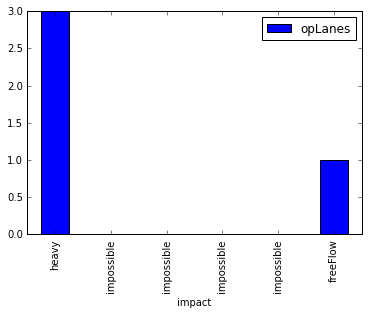

In [9]:
impacts.plot("impact","opLanes",kind="bar")

Se puede observar en el primer diagrama que a mayor cantidad de carriles operativos menor impacto hay en el tráfico, aunque también dependería de qué tráfico suele haber en el lugar.

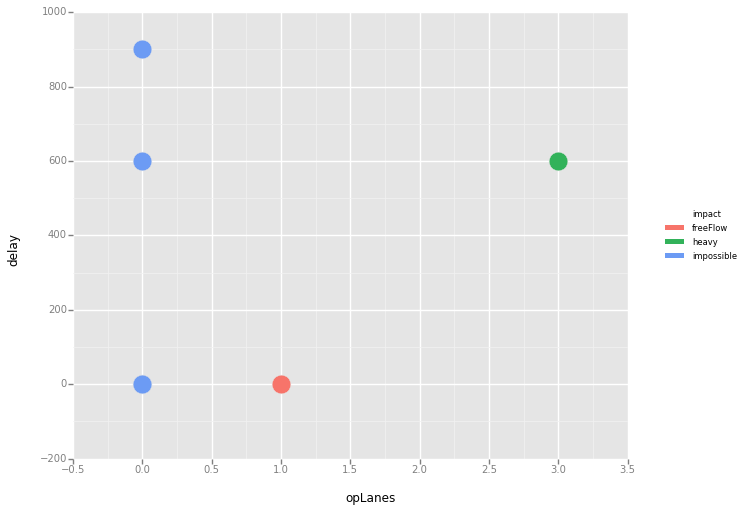

<ggplot: (21339189)>

In [52]:
qplot(data=impacts, x="opLanes", y="delay", color="impact") + geom_point(size = 350)

De igual forma, los retrasos suelen subir cuando los carriles operativos son menores